In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

assert hasattr(tf, "function")
print(tf.__version__)

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets[:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)


# Normalisation des données
scaler = StandardScaler()
images = scaler.fit_transform(images)


images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state =1)

print(images_train.shape, targets_train)
print(images_test.shape, targets_test)
# print(images[0])
# Plot one of the data
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[0], (28, 28)), cmap="binary")
plt.title(targets_names[targets[0]])
plt.show()


2.0.0-rc1
(8000, 784) [3 6 4 ... 0 1 6]
(2000, 784) [1 8 1 ... 6 4 0]


<Figure size 640x480 with 1 Axes>

In [2]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))


# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])


[[0.0463369  0.03102104 0.03835187 0.02333516 0.03794254 0.02314657
  0.04075191 0.03823638 0.52358323 0.19729437]] [9]


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [5]:
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 123us/sample - loss: 0.9293 - accuracy: 0.6948 - val_loss: 0.6704 - val_accuracy: 0.7625
Epoch 2/10
6400/6400 [==============================] - 0s 67us/sample - loss: 0.5646 - accuracy: 0.8008 - val_loss: 0.5729 - val_accuracy: 0.7850
Epoch 3/10
6400/6400 [==============================] - 0s 65us/sample - loss: 0.4743 - accuracy: 0.8330 - val_loss: 0.5381 - val_accuracy: 0.8006
Epoch 4/10
6400/6400 [==============================] - 0s 67us/sample - loss: 0.4240 - accuracy: 0.8525 - val_loss: 0.5104 - val_accuracy: 0.8106
Epoch 5/10
6400/6400 [==============================] - 0s 66us/sample - loss: 0.3865 - accuracy: 0.8683 - val_loss: 0.4766 - val_accuracy: 0.8206
Epoch 6/10
6400/6400 [==============================] - 0s 69us/sample - loss: 0.3567 - accuracy: 0.8783 - val_loss: 0.4644 - val_accuracy: 0.8250
Epoch 7/10
6400/6400 [==============================] - 0s 66us/sampl

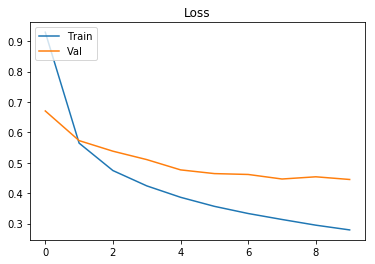

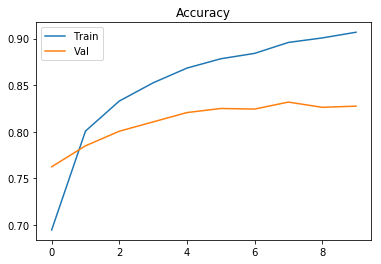

In [6]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [7]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)
# En local pip install h5py

# sauvgarder le modèle
# model.save('simple_nn.h5')
# telecharger un modèle enregistré
loaded_model = tf.keras.models.load_model('simple_nn.h5')
loss, acc = loaded_model.evaluate(images_test, targets_test)
print(loaded_model.predict(images_test[0:1]), targets_test[0:1])


2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss 0.4437301981449127
Test Accuracy 0.8515
2000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[[7.4799248e-04 9.9640405e-01 1.9338632e-04 2.4959003e-03 6.8914371e-05
  3.0438214e-06 5.1954767e-06 2.3126831e-05 5.6468674e-05 1.8478850e-06]] [1]
